100%|██████████| 10000000/10000000 [01:53<00:00, 88332.29it/s]


Spr cumulants: [0, 6.189401439894489, 10.060197846283636, 49.8691269871461, 272.08359339852905, 330.66821104922565]
Result cumulants [0, 8.091518853960926, 12.924018007255455, 59.11471120788235, 317.10553568317846, 625.0563967905473]
Calculated cumulants: [0, 1.9021174140664368, 2.8638201609718195, 9.245584220736248, 45.02194228464941, 294.38818574132165]
Actual cumulants: [0, 1.9110955767762217, 2.920432327473005, 9.72586290451069, 47.97152467242279, 300.82892897332897]
Cumulants (relative discrepancies): [0, -0.004697914023185561, -0.019384858183024926, -0.04938160125120586, -0.06148610885134095, -0.02140998624696213]


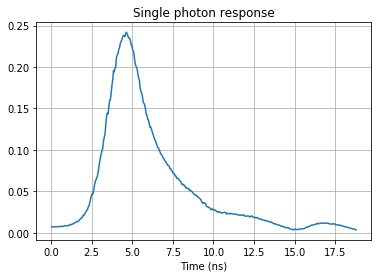

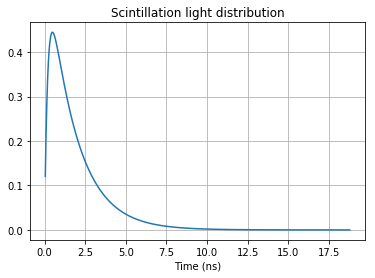

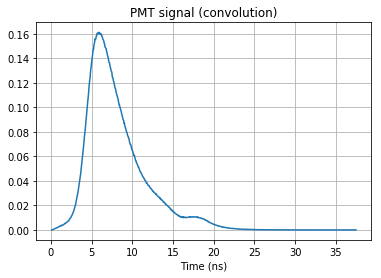

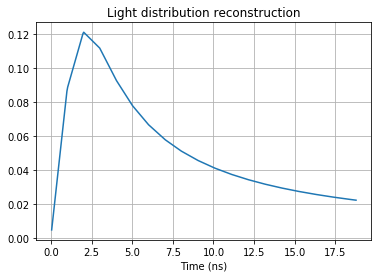

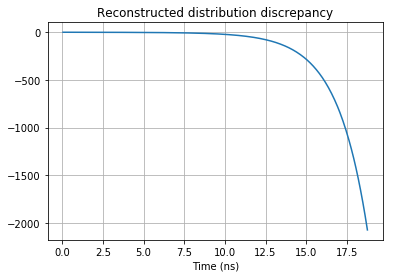

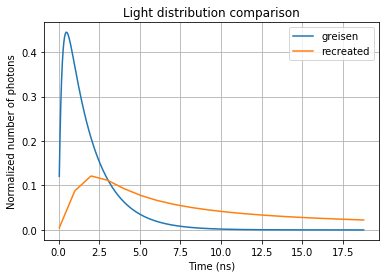

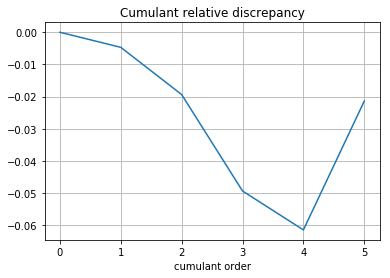

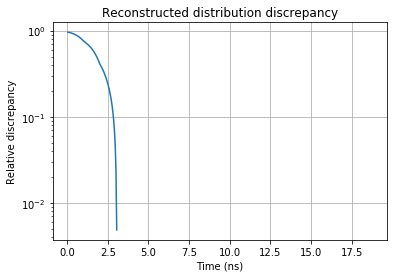

In [63]:
%run pmt_signal.py 10000000 plot

In [79]:
from scipy import special, integrate
import numpy as np

def jacobi_recreate(t, moments):
    t = np.array(t)
    l = len(moments)
    jacobi = [ special.jacobi(i,0,0) for i in range(l) ] # define jacobi polys in range [-1,1]
    
    for j in range(l):
        jacobi[j] /= math.sqrt(integrate.quad(jacobi[j]**2,-1,1)[0]) # normalize
    
    coeff = list()
    for j in range(l):
        s = 0
        for k in range(j+1):
            s += jacobi[j].c[j-k]*moments[k]
        coeff.append(s)
        
    dist = sum([coeff[j]*jacobi[j](t) for j in range(l)])
    return dist

/home/anto/Dropbox/slac/work/code/convolution_utils.py:82: RuntimeWarning: invalid value encountered in double_scalars
  self.dist_array = [x/s for x in self.dist_array]


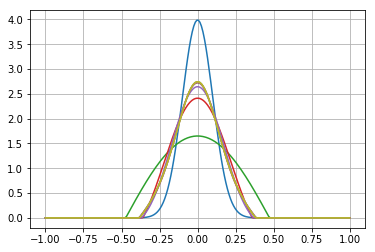

In [104]:
x = np.linspace(-1,1,200)
sigma=.1
gauss = Distribution(lambda x: math.exp(-x**2/2/sigma**2)/sigma/math.sqrt(2*math.pi), x)
gauss.discretize()
gauss.normalize()

plt.grid()
plt.plot(x,gauss.dist_array)
for order in range(1,40,5):
    m = gauss.moments(order)
    l = len(m)
    jacobi = [ special.jacobi(i,0,0) for i in range(l) ]
    coeff = [
        sum([jacobi[k].c[-1-i]*m[i] for i in range(k)])
        for k in range(l)
    ]
    g = sum([jacobi[j]*coeff[j] for j in range(l)])
    d = Distribution([el if el>0 else 0 for el in g(x)],x)
    d.normalize()
    plt.plot(x, d.dist_array)

[0.9999999999999998, -4.781848795679978e-18, 0.010000000000000004, -8.179814476161694e-20, 0.0003000000000000004, -7.51971906239109e-21, 1.5000000000000022e-05, 1.3212581029182043e-21, 1.0500000000000022e-06, 1.5159872416230367e-24]

[1.0000000000000009, 9.199343371499547e-18, 0.009999999999999998, -3.185344593280658e-20, 0.00030000000000000035, -6.056286534488337e-21, 1.5000000000000009e-05, -7.39784506864395e-22, 1.0499999999999997e-06, -3.941535220447459e-23]

[0.5000000000000004, 2.2998358428748868e-18, 0.0012499999999999998, -1.9908403708004113e-21, 9.375000000000011e-06, -9.462947710138027e-23, 1.1718750000000007e-07, -2.889783229939043e-24, 2.0507812499999994e-09, -3.849155488718222e-26]


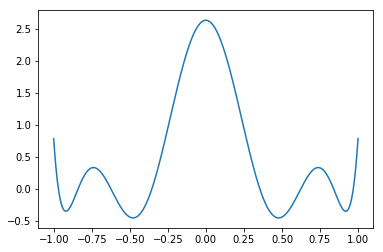

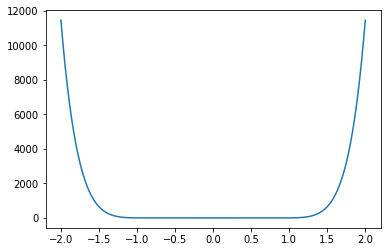

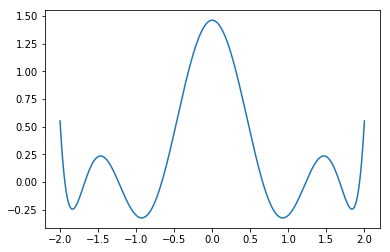

In [61]:
import scipy

def shrink_support(moments, t, s=[-1,1]):
    l = len(moments)
    new_moments = list()
    a = (s[-1]-s[0])/(t[-1]-t[0])
    b = s[-1]-t[-1]*a
    for k in range(l):
        s = 0
        for n in range(k+1):
            s += scipy.special.binom(k,n)*a**(k-n+1)*b**n*moments[k-n]
        new_moments.append(s)
    return new_moments
    return [ new_moments[j]/new_moments[0] for j in range(l) ]

ord = 10
sigma=.1
gaussf = lambda x: math.exp(-x**2/2/sigma**2)/sigma/math.sqrt(2*math.pi)
x1 = np.linspace(-1,1,1000)
x2 = np.linspace(-2,2,1000)
g1 = Distribution(gaussf, x1)
g2 = Distribution(gaussf, x2)
m1 = g1.moments(ord)
m2 = g2.moments(ord)
m3 = shrink_support(m2, x2, x1)
print(m1,m2,m3, sep='\n\n')

r1 = jacobi_recreate(x1, m1)
r2 = jacobi_recreate(x2, m2)
r3 = jacobi_recreate(x1, m3)
plt.plot(x1,r1)
plt.show()
plt.plot(x2,r2)
plt.show()
plt.plot(x2,r3)
plt.show()

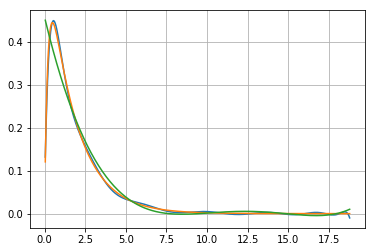

In [105]:
ord = 15
m = light_dist.moments(ord)
t = light_dist.x
m2 = Distribution.moments_from_cumulants(calc_light_cumulants)

r1 = Distribution.jacobi_recreate(t,m)
r2 = Distribution.jacobi_recreate(t,m2)

plt.grid()
plt.plot(t,r1.dist_array)
plt.plot(t,light_dist.dist_array)
plt.plot(t,r2.dist_array)
plt.show()

100%|██████████| 10000000/10000000 [02:03<00:00, 81213.99it/s]


[0, 1, 2, 3, 4, 5, 6, 7]
Spr cumulants: [0, 6.189336438859892, 10.042034251793623, 49.710060957427345, 270.6406150696803, 328.2591685944062, -23175.16980926739, -455322.4037465751]
Result cumulants [0, 11.342137039452542, 26.215268559432786, 122.1348906885105, 447.13982149261574, -2581.7250871192664, -82162.86478291824, -817495.2921699286]
Calculated cumulants: [0, 5.152800600592649, 16.173234307639163, 72.42482973108315, 176.49920642293546, -2909.9842557136726, -58987.694973650854, -362172.88842335343]
Actual cumulants: [0, 5.171813912941504, 16.367905525258756, 73.91903580179888, 182.97812277130106, -2942.326344672081, -60095.68471094617, -367463.1632142626]
Cumulants (relative discrepancies): [0, -0.003676333423613178, -0.011893471484129644, -0.020214090382918267, -0.03540814743445263, -0.010992012839423172, -0.018437093156099732, -0.014396748628173259]


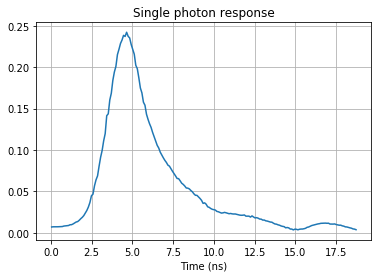

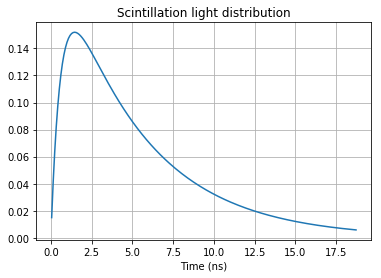

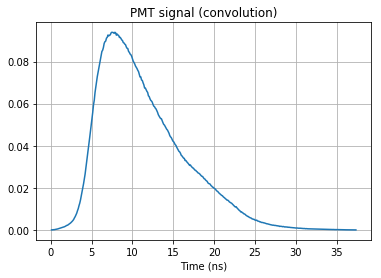

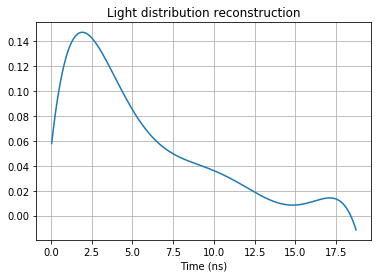

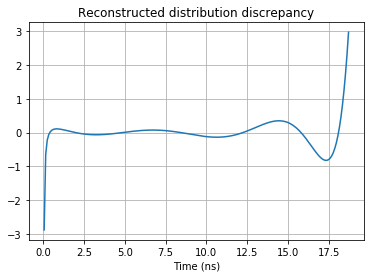

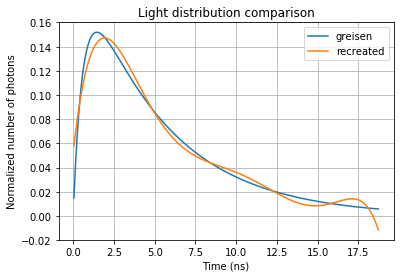

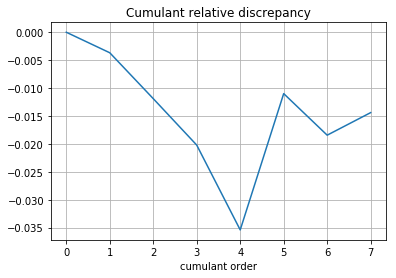

In [107]:
%run pmt_signal.py 10000000 plot